In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Indian_Trader_Loss_Dataset.csv')

In [3]:
df.head()

,Trader_ID,Age_Group,Investment_Type,Investment_Amount_INR,Loss_Percentage,Holding_Period,Platform_Used,Source_of_Advice,Reason_for_Loss,Recovery_Action,Emotional_State_After_Loss,Loss_Year
0,T0001,20-30,Stock,398786,37.00,1-3 Months,Upstox,Financial Advisor,FOMO,Exited,Indifferent,2022
1,T0002,20-30,Stock,59123,32.49,>1 Year,ICICI Direct,YouTube,Bad Timing,Averaged Down,Indifferent,2022
2,T0003,31-40,Mutual Fund,318944,37.26,<1 Month,Upstox,Financial Advisor,Pump & Dump,Still Holding,Motivated to Learn,2020
3,T0004,31-40,Futures & Options,63587,22.42,<1 Month,Groww,Instagram,Bad Timing,Still Holding,Panic,2024
4,T0005,51+,IPO,75444,92.85,6-12 Months,Zerodha,Self,No Stop Loss,Still Holding,Indifferent,2020


In [4]:
#1 Top 5 Loss Reasons

In [8]:
df['Reason_for_Loss'].value_counts().head(5)

Reason_for_Loss
Poor Research    58
No Stop Loss     57
FOMO             50
Pump & Dump      50
Bad Timing       45
Name: count, dtype: int64

In [9]:
#2 Average Loss Percentage by Investment Type

In [11]:
df['Loss_Percentage'].mean()

53.96163333333334

In [17]:
df.groupby(by='Investment_Type')['Loss_Percentage'].mean().sort_values(ascending=False)

Investment_Type
IPO                  56.845082
Mutual Fund          54.171000
Stock                53.979333
Futures & Options    53.313607
Crypto               51.375690
Name: Loss_Percentage, dtype: float64

In [18]:
#3 Which Age Group Loses Most (Avg %)

In [25]:
df.groupby(by='Age_Group')['Loss_Percentage'].mean().sort_values(ascending=False)

Age_Group
41-50    55.754638
51+      54.176087
20-30    54.031389
31-40    51.745672
Name: Loss_Percentage, dtype: float64

In [26]:
#4 Total Amount Lost by Platform

In [35]:
df['total_lost_amount'] = round(df['Investment_Amount_INR'] * df['Loss_Percentage']/100)

In [42]:
df.groupby('Platform_Used')['total_lost_amount'].sum().sort_values(ascending=False)

Platform_Used
Upstox          8503323.0
ICICI Direct    6844784.0
Angel One       6808186.0
Zerodha         6644460.0
5Paisa          6242493.0
Groww           5640468.0
Name: total_lost_amount, dtype: float64

In [45]:
#5 Most Common Emotional State After Loss

In [47]:
df['Emotional_State_After_Loss'].value_counts()

Emotional_State_After_Loss
Indifferent           69
Motivated to Learn    63
Panic                 60
Blamed Market         58
Depression            50
Name: count, dtype: int64

In [48]:
#6 Holding Period vs Loss %

In [55]:
df.groupby('Holding_Period')['Loss_Percentage'].mean().sort_values(ascending=False)

Holding_Period
6-12 Months    56.934286
3-6 Months     54.821967
>1 Year        53.517727
<1 Month       52.736538
1-3 Months     52.024000
Name: Loss_Percentage, dtype: float64

In [56]:
#7 Loss Trend Over Years

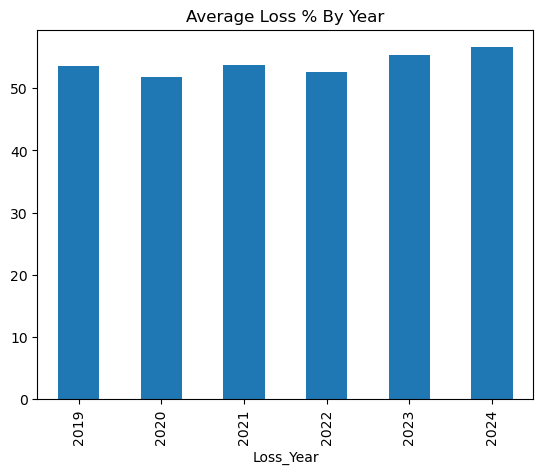

In [66]:
df.groupby(by='Loss_Year')['Loss_Percentage'].mean().plot(kind='bar',title = 'Average Loss % By Year');